## CS 237 Homework 11 (Programming Problem) 

**Due Thursday April 21st at Midnight (1 minute after 11:59pm) in Gradescope (with grace period of 6 hours).
Homeworks may be submitted up to 24 hours late with a 10% penalty (same grace period).**

Enter your solutions in this notebook and submit as an IPYNB file on Gradescope. Don't forget to include information about your collaborators (or say **Collaborators: none**).

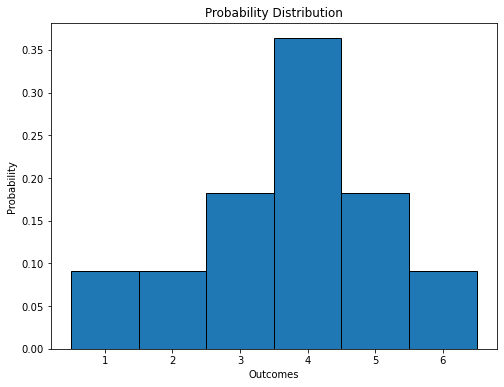

In [5]:
# Here are some imports which will be used in code that we write for CS 237

# Imports used for the code in CS 237

import numpy as np                # arrays and functions which operate on array
import matplotlib.pyplot as plt   # normal plotting
import pandas as pd               # Data input and manipulation
from numpy import mean, var, std
from numpy.random import choice,seed,shuffle

from collections import Counter

%matplotlib inline 

# This draws a useful bar chart for the distribution of the
# list of integers in outcomes

def show_distribution(outcomes, title='Probability Distribution', my_xticks = [], f_size = (8,6)):
    plt.figure(figsize=f_size)
    num_trials = len(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    if my_xticks != []:
        plt.xticks(X, my_xticks)
    elif (X[-1] - X[0] < 30):
        ticks = range(X[0],X[-1]+1)
        plt.xticks(ticks, ticks) 
    plt.xlabel("Outcomes")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()
    
# Example of use

show_distribution([1,4,3,5,4,6,2,4,3,5,4])


## Chebyshev and Real Data

In this problem, we will investigate Chebyshev's Inequality last week and try experiments
to see how our analytical results compare with real data. 

Spoiler Alert:  We will see that Chebyshev's Inequality applies to ANY distribution; when the distribution
is reasonably well-behaved, the bounds are not very "tight." We will explore ways to better understand distributions
such as the GPA data next week. 

Please review slides 2 -- 9 from lecture before starting this problem. 

First we read data about students from a large university in the northeast. We will extract the gender and GPA of 4286
students.  

  Gender ClassYear  GPA  CreditsEarned  TransferCredits  APCredits
0      F        U2  4.0           33.0              0.0         12
1      M        U3  4.0           16.0             52.0         16
2      F        U2  4.0           32.0              0.0          0
3      M        U3  4.0           68.0             14.0          0
4      M        U2  4.0           36.0              0.0         56
len(Genders) = 4286
[1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
len(GPAs) = 4286
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]


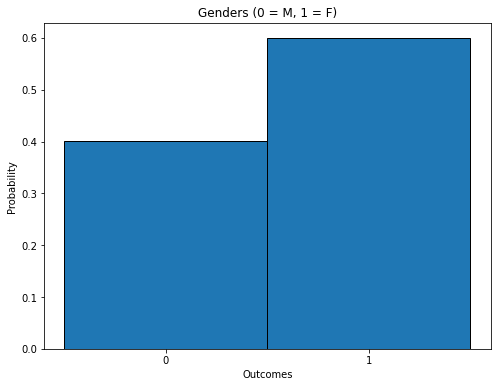

Percentage of women in population: 0.5993933737750816


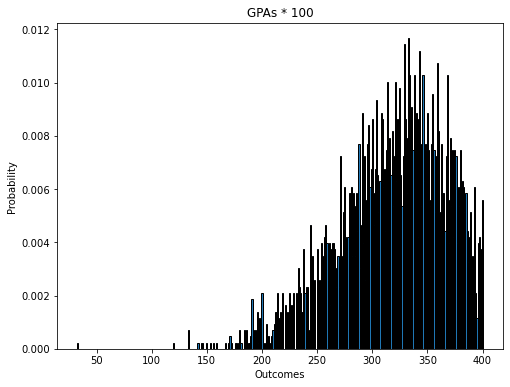

Mean GPA: 3.1736234251049935


In [6]:
# Read data from Snyder's CS 237 data repository

Students = pd.read_csv('https://www.cs.bu.edu/fac/snyder/cs237/Data/studentdata.csv')

print(Students[:5])

# encode 'M' as 0 and 'F' as 1
Gender = [ 0 if g == 'M' else 1 for g in list(Students['Gender'])]
print("len(Genders) =",len(Gender))
print(Gender[:10])


GPA = list(Students['GPA'])
print("len(GPAs) =",len(GPA))
print(GPA[:10])


show_distribution(Gender,title="Genders (0 = M, 1 = F)")
print("Percentage of women in population:", mean(Gender))
show_distribution(100*np.array(GPA), title="GPAs * 100")
print("Mean GPA:", mean(GPA))

## Problem 1 (2 points)

In this problem, we will simply try to experimentally verify Chevyshev's Inequality on the GPA data. 

Complete the template below, experiment with various values of a, and answer the question below. 

In [11]:
mu1 = mean(GPA)
var1 = var(GPA)

a = 0.5                # try various values, but reset to 0.5 before submitting

#estimate = 0            # just to get it to compile, your calculation here

prob = abs(GPA - mu1)
estimate = var1/a**2
#esta
print("Chebyshev: Pr( |GPA - mu | >= ",a,") \t<=",estimate)
# Calculate the actual percentage of the GPA scores that are in this interval


count = 0 
bound1 = mu1+a 
bound2 = mu1-a

for i in range(len(GPA)):
    if(GPA[i]> bound1 or GPA[i]< bound2):
        count+=1
p = 1-(count/(len(GPA)))
#p = count/(len(GPA)
    

                 # just to get it to compile, your calculation here

print("Actual % of |GPA - mu | >= ",a,"\t =",p)



Chebyshev: Pr( |GPA - mu | >=  0.5 ) 	<= 0.9644774878283895
Actual % of |GPA - mu | >=  0.5 	 = 0.6684554363042463


Answer this question:  After trying various values for a, how good an estimate of the upper bound does Chebyshev's Inequality give for this particular data set?

Your answer: it is not a good estimate of te upper bound since its around 33% off the actual value

## Problem 2 (3 points)

Now we will experimentally verify the results on polling presented on slides 8 & 9 on Thursday.
We will treat the Gender data as a poll, finding out what percentage of women are in the list of students. 
This percentage $p$ is simply the mean of the list (since genders are encoded as 0 and 1). 

Our goal is to see how accurate is the estimate that we need 3125 samples to get an estimate of $p$ to within 4% of its true value, with 95% probability. 

The approach we will take is to repeatedly shuffle the Gender list, and then find the mean of increasingly-large
samples from the beginning of this list, representing what would happen if we sampled more and more people
from the population. For a particular shuffle, the mean will approach the population mean shown above. 

The steps to take in completely this template are as follows:

- Define the list X as the sequence of all possible sample sizes from a population of 4286 students (from 1 to the whole list)
- Do the following num_trials = 30 times:
  - Shuffle the Gender list
  - For each sample size x in X, find the mean of the first x members of the shuffled Gender list
  - Collect these 4286 means into a list Y
  - plot X and Y
  
The result will be multiple (brightly colored) plots showing how the means as they converge to the true mean (shown
in red).  The question is how much we can bound the variation in the estimate of $p$ as a result of
larger and larger random samples. The theoretical results said we need 3125 samples; how accurate is this?

Complete the template below and answer the question below. 

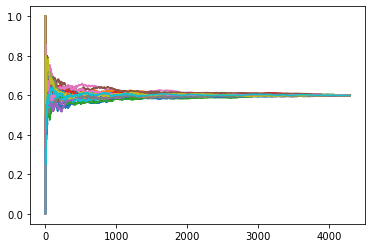

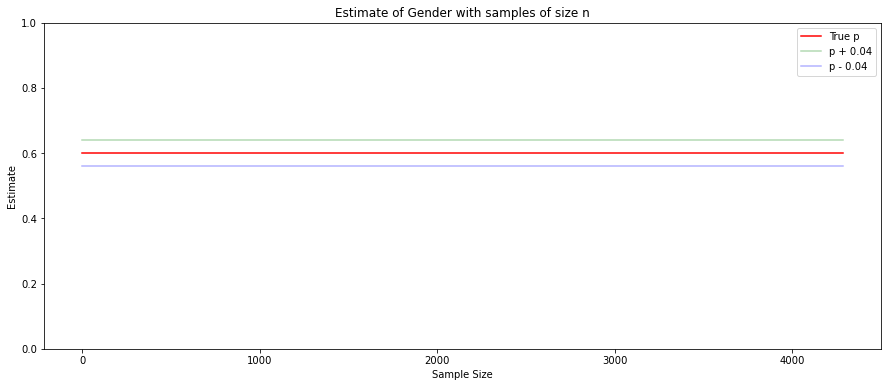

In [12]:
# Polling example from lecture
import random
mu2 = mean(Gender)

seed(0)               # try without, but include this line before submitting
num_trials = 30
first_values = 4
X = [n for n in range(1,len(Gender)+1)]
for k in range(num_trials):
    Y = []
    shuffle(Gender)
    for x in X:
        Y.append(mean(Gender[:x]))
    plt.plot(X, Y)


plt.figure(figsize=(15, 6))
plt.plot([1,len(Y)+1],[mu2,mu2],color='r',label="True p")
plt.plot([1,len(Y)+1],[mu2+0.04,mu2+0.04],alpha=0.3,color='g',label="p + 0.04")
plt.plot([1,len(Y)+1],[mu2-0.04,mu2-0.04],alpha=0.3,color='b',label="p - 0.04")
plt.title('Estimate of Gender with samples of size n')
plt.xlabel("Sample Size")
plt.ylabel("Estimate")
plt.ylim([0,1])
plt.legend()
plt.show()

Answer this question: Remove the seed and try this several times (put back seed before submitting).  Again, how good an estimate of the upper bound of the deviation from the
mean does Chebyshev's Inequality give? How accurate is the estimate that we need 3125 votes to get p within 4% of
its true value? 

Your answer: its fairly accurate as shown in the graph